In [1]:
"""Author: Sameer Kesava

Linear Regression of Automobile Data 

Leave-One-Out Cross Validation

Plotting the data set, fit and residuals after Regression

Problem statement from Chapter 5
Book: An Introduction to Statistical Learning with Applications in R, 
       Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani

Dataset: Auto (downloaded from https://www-bcf.usc.edu/~gareth/ISL/ and converted to csv)

Packages used: numpy, pandas, sklearn and matplotlib"""

'Author: Sameer Kesava\n\nLinear Regression of Automobile Data \n\nLeave-One-Out Cross Validation\n\nPlotting the data set, fit and residuals after Regression\n\nProblem statement from Chapter 5\nBook: An Introduction to Statistical Learning with Applications in R, \n       Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani\n\nDataset: Auto (downloaded from https://www-bcf.usc.edu/~gareth/ISL/ and converted to csv)\n\nPackages used: numpy, pandas, sklearn and matplotlib'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
pd.options.display.max_columns = 100

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [4]:
data_df = pd.read_csv("Auto")
data_df.head(10)

,Unnamed: 0,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,1,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,2,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,3,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,4,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,5,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino
5,6,15.0,8.0,429.0,198.0,4341.0,10.0,70.0,1.0,ford galaxie 500
6,7,14.0,8.0,454.0,220.0,4354.0,9.0,70.0,1.0,chevrolet impala
7,8,14.0,8.0,440.0,215.0,4312.0,8.5,70.0,1.0,plymouth fury iii
8,9,14.0,8.0,455.0,225.0,4425.0,10.0,70.0,1.0,pontiac catalina
9,10,15.0,8.0,390.0,190.0,3850.0,8.5,70.0,1.0,amc ambassador dpl


In [5]:
data_df.drop(columns = 'Unnamed: 0', inplace=True)
data_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut

In [7]:
len(data_df)

392

In [8]:
#Checking Correlation
data_df.corr(method = 'pearson')

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [9]:
loocv = LeaveOneOut()

In [10]:
loocv.get_n_splits(data_df['mpg'])

392

#### Linear Model y = a0 + a1 * x; No Cross Validation

In [11]:
X =  data_df[['horsepower']]
X.head()

,horsepower
0,130.0
1,165.0
2,150.0
3,150.0
4,140.0


In [12]:
Y =  data_df['mpg'].values
Y[:5]

array([18., 15., 18., 16., 17.])

In [13]:
lr = LinearRegression()

In [14]:
fit_data = lr.fit(X,Y)

In [15]:
fit_data.score(X,Y)

0.6059482578894348

In [16]:
fit_data.coef_

array([-0.15784473])

In [17]:
fit_data.intercept_

39.93586102117047

In [18]:
test_fit = fit_data.predict(X)
test_fit[:5]

array([19.41604569, 13.89148002, 16.25915102, 16.25915102, 17.83759835])

In [19]:
test_fit[0]

19.416045685195492

In [20]:
MSE = 0
for i in zip(Y, test_fit):
    MSE = MSE + (i[0] - i[1])**2
MSE = MSE/len(Y)

MSE

23.943662938603115

In [21]:
#pd.DataFrame(data = list(zip(y_test['mpg'], test_fit.ravel()))).head()

####  Linear Model y = a0 + a1 * x; Leave-One-Out Cross Validation

In [22]:
for i,j in loocv.split(X.head(4)):
    print(X.iloc[i], '\n', X.iloc[j])

   horsepower
1       165.0
2       150.0
3       150.0 
    horsepower
0       130.0
   horsepower
0       130.0
2       150.0
3       150.0 
    horsepower
1       165.0
   horsepower
0       130.0
1       165.0
3       150.0 
    horsepower
2       150.0
   horsepower
0       130.0
1       165.0
2       150.0 
    horsepower
3       150.0


In [23]:
MSE = 0
for i,j in loocv.split(X):
    #print(i,j)
    fit_loocv = lr.fit(X.iloc[i],Y[i])
    test_fit_loocv = fit_loocv.predict(X.iloc[j])
    #print(test_fit_loocv, Y[j])
    MSE = MSE + (Y[j] - test_fit_loocv[0])**2

MSE = MSE[0]/len(Y)

MSE

24.231513517929248

#### Binomial model y = a0 + a1 * x + a2 * x^2 

In [24]:
X2 =X.copy()
X2['horsepower^2'] = X['horsepower']**2
X2.head()

,horsepower,horsepower^2
0,130.0,16900.0
1,165.0,27225.0
2,150.0,22500.0
3,150.0,22500.0
4,140.0,19600.0


In [25]:
MSE_2 = 0
for i,j in loocv.split(X2):
    #print(i,j)
    fit_loocv_2 = lr.fit(X2.iloc[i],Y[i])
    test_fit_loocv_2 = fit_loocv_2.predict(X2.iloc[j])
    #print(test_fit_loocv, Y[j])
    MSE_2 = MSE_2 + (Y[j] - test_fit_loocv_2[0])**2

MSE_2 = MSE_2[0]/len(Y)

MSE_2

19.248213124489677

#### 3rd degree polynomial model y = a0 + a1 * x + a2 * x^2 + a3 * x^3 

In [26]:
X3 =X2.copy()
X3['horsepower^3'] = X['horsepower']**2
X3.head()

,horsepower,horsepower^2,horsepower^3
0,130.0,16900.0,16900.0
1,165.0,27225.0,27225.0
2,150.0,22500.0,22500.0
3,150.0,22500.0,22500.0
4,140.0,19600.0,19600.0


In [27]:
MSE_3 = 0
for i,j in loocv.split(X3):
    #print(i,j)
    fit_loocv_3 = lr.fit(X3.iloc[i],Y[i])
    test_fit_loocv_3 = fit_loocv_3.predict(X3.iloc[j])
    #print(test_fit_loocv, Y[j])
    MSE_3 = MSE_3 + (Y[j] - test_fit_loocv_3[0])**2

MSE_3 = MSE_3[0]/len(Y)

MSE_3

19.248213124489684

""" Binomial model appears to be the best fit """

#### Plotting

In [28]:
binomial_fit = lr.fit(X2, Y)

In [29]:
binomial_fit.coef_

array([-0.46618963,  0.00123054])

In [30]:
binomial_fit.intercept_

56.90009970211295

In [31]:
Y_fit = binomial_fit.predict(X2)
Y_fit[:5]

array([17.09150791, 13.4801561 , 14.65871748, 14.65871748, 15.75205908])

In [32]:
residuals = Y - Y_fit

In [33]:
residuals[:5]

array([0.90849209, 1.5198439 , 3.34128252, 1.34128252, 1.24794092])

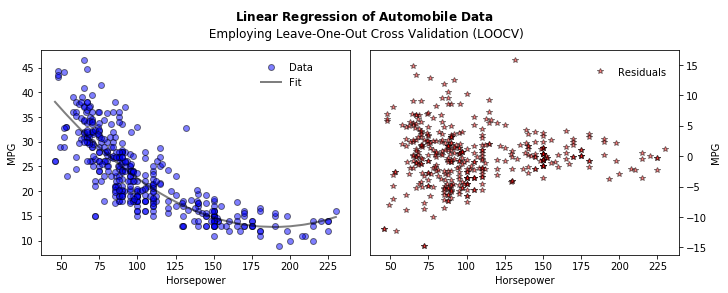

In [34]:
#Plotting the data set and residuals using the binomial model 
fig, ax = plt.subplots(1,2, figsize=(10,4), constrained_layout =True, sharex=True, sharey=False)
alpha = 0.5 #transparency 

ax[0].set_xlabel('Horsepower')
ax[0].set_ylabel('MPG')
ax[0].plot(X, Y, 'o', alpha=alpha, color = 'blue', markeredgecolor = 'k', label = 'Data')
ax[0].plot(X.sort_values('horsepower'), binomial_fit.predict(X2.sort_values('horsepower')).ravel(), alpha=alpha, lw = 2, \
        color = 'k', label = 'Fit')
lgd = ax[0].legend(loc = (0.7, 0.8), frameon=False)

ax[1].set_xlabel('Horsepower')
ax[1].set_ylabel('MPG')
ax[1].yaxis.tick_right()
ax[1].yaxis.set_label_position("right")
ax[1].plot(X, residuals, '*', alpha=alpha, color = 'red', markeredgecolor = 'k', label = 'Residuals')
lgd = ax[1].legend(loc = (0.7, 0.85), frameon=False)

fig.suptitle('$\mathbf{Linear\ Regression\ of\ Automobile\ Data}$ \n Employing Leave-One-Out Cross Validation (LOOCV)')
#ax.text(x = 150, y= 30, s = 'Automobile Data split 50:50')
#fig.tight_layout()

plt.show()

In [35]:
fig.savefig('LOOCV_LinReg.png', dpi = 100, format = 'png')